CLUSTERING:

In statistica, il clustering o analisi dei gruppi (dal termine inglese cluster analysis, introdotto da Robert Tryon nel 1939) è un insieme di tecniche di analisi multivariata dei dati volte alla selezione e raggruppamento di elementi omogenei in un insieme di dati.

Le tecniche di clustering si basano su misure relative alla somiglianza tra gli elementi. In molti approcci questa similarità, o meglio, dissimilarità, è concepita in termini di distanza in uno spazio multidimensionale. La bontà delle analisi ottenute dagli algoritmi di clustering dipende molto dalla scelta della metrica, e quindi da come è calcolata la distanza. Gli algoritmi di clustering raggruppano gli elementi sulla base della loro distanza reciproca, e quindi l'appartenenza o meno a un insieme dipende da quanto l'elemento preso in esame è distante dall'insieme stesso. La distanza tra due elementi è una misura della loro similarità, e quindi due elementi molto simili avranno una distanza minore rispetto a due elementi poco simili.

Clustering partizionale:

 - https://it.wikipedia.org/wiki/Clustering#Clustering_partizionale

Il clustering partizionale è un metodo di clustering che consiste nel partizionare l'insieme di dati in un numero di gruppi prefissato. L'obiettivo è quello di minimizzare una funzione obiettivo, che è una funzione della somma delle distanze tra gli elementi e i centroidi dei gruppi. La funzione obiettivo è definita come:

$$\sum_{i=1}^{k}\sum_{x\in C_{i}}\left \| x-c_{i} \right \|^{2}$$

dove $C_{i}$ è il $i$-esimo cluster e $c_{i}$ è il centroide del $i$-esimo cluster.

L'algoritmo di clustering partizionale più noto è l'algoritmo K-means. 

K-MEANS:

 - https://it.wikipedia.org/wiki/K-means

L'algoritmo K-means è un algoritmo iterativo che consiste in due passi:

1. Assegnazione: ogni osservazione viene assegnata al cluster con il centroide più vicino.
2. Aggiornamento: i centroidi dei cluster vengono aggiornati.

L'algoritmo termina quando non ci sono più cambiamenti nelle assegnazioni.


L'obiettivo che l'algoritmo si prepone è di minimizzare la varianza totale intra-gruppo; ogni gruppo viene identificato mediante un centroide o punto medio. L'algoritmo segue una procedura iterativa: inizialmente crea k partizioni e assegna i punti d'ingresso a ogni partizione o casualmente o usando alcune informazioni euristiche; quindi calcola il centroide di ogni gruppo; costruisce in seguito una nuova partizione associando ogni punto d'ingresso al gruppo il cui centroide è più vicino ad esso; infine vengono ricalcolati i centroidi per i nuovi gruppi e così via, finché l'algoritmo non converge. 

In [1]:
# facciamo un esempio di clustering partizionale
# importiamo le librerie
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

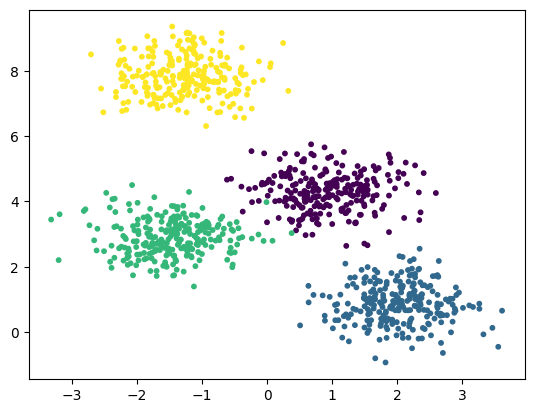

In [4]:
# creiamo un dataset
# n_samples: numero di osservazioni, centers: numero di cluster, cluster_std: deviazione standard dei cluster, random_state: seed per la generazione dei dati
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0) 

# visualizziamo il dataset
plt.scatter(X[:,0], X[:,1], c=y, s=10)
plt.show()

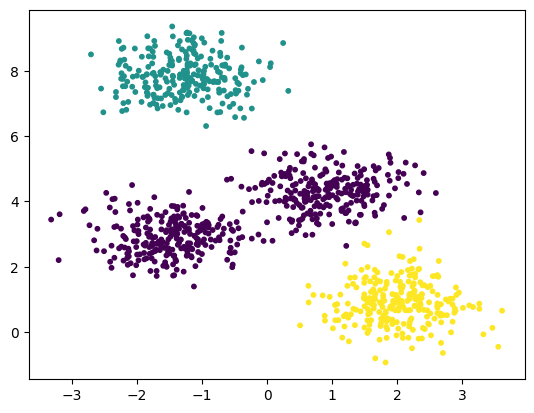

In [5]:
# creiamo il modello
# per il clustering partizionale dobbiamo specificare il numero di cluster
kmeans = KMeans(n_clusters=3)

# addestriamo il modello
kmeans.fit(X)

# prediciamo i cluster
y_kmeans = kmeans.predict(X)

# visualizziamo i cluster
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=10)

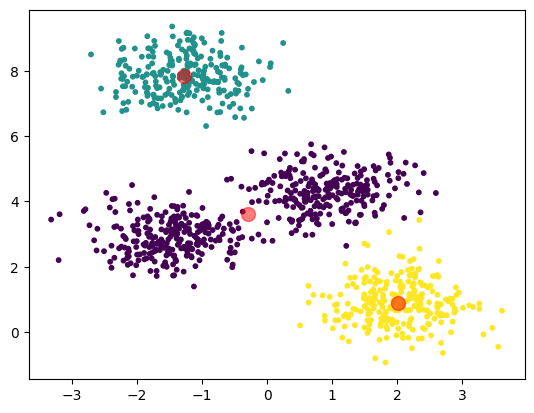

In [7]:
# visualizziamo i centroidi
centers = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=10)
plt.scatter(centers[:,0], centers[:,1], c='red', s=100, alpha=0.5)
plt.show()

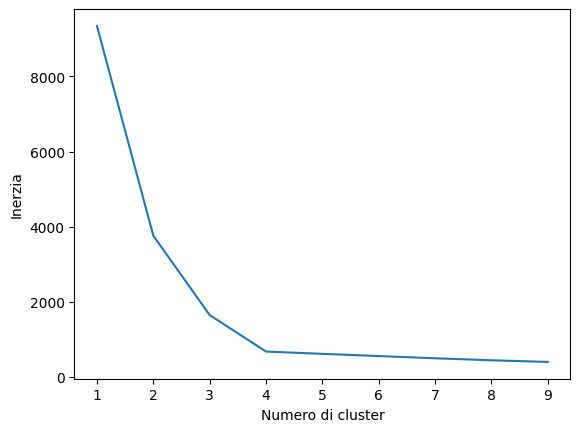

In [9]:
# calculiamo l'inerzia
# l´inerzia è la somma delle distanze quadrate tra ogni osservazione e il centroide del cluster
# e serve per valutare la qualità del clustering. Più è bassa l'inerzia, meglio è il clustering
kmeans.inertia_

# visualizziamo l'inerzia per diversi valori di k
inerzia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inerzia.append(kmeans.inertia_)

plt.plot(range(1, 10), inerzia)
plt.xlabel('Numero di cluster')
plt.ylabel('Inerzia')
plt.show()



Silhouette:  0.606489463270391


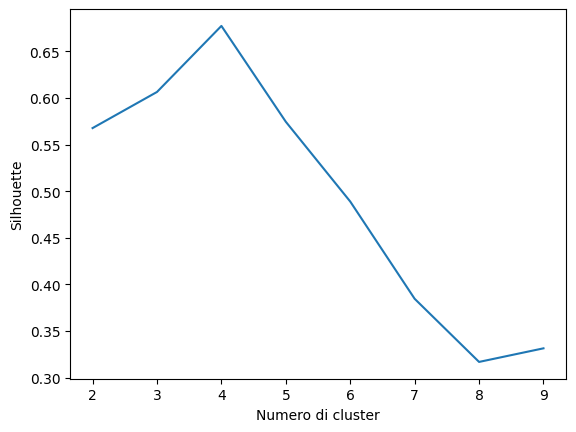

In [10]:
# calcoliamo l'indice di Silhouette
# l'indice di Silhouette è un metodo per valutare la qualità del clustering
# varia tra -1 e 1, dove 1 indica un buon clustering e -1 un clustering non buono
from sklearn.metrics import silhouette_score

print('Silhouette: ', silhouette_score(X, y_kmeans))

# visualizziamo l'indice di Silhouette per diversi valori di k
silhouette = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    silhouette.append(silhouette_score(X, y_kmeans))

plt.plot(range(2, 10), silhouette)
plt.xlabel('Numero di cluster')
plt.ylabel('Silhouette')
plt.show()

Calinski-Harabasz:  2733.8629198417952


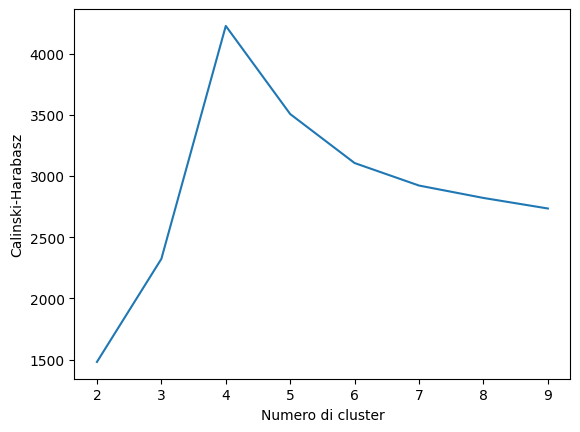

In [11]:
# Calcoliamo l'indice di Calinski-Harabasz
# l'indice di Calinski-Harabasz è un metodo per valutare la qualità del clustering
# varia tra 0 e infinito, dove 0 indica un clustering non buono e valori più alti indicano un buon clustering
from sklearn.metrics import calinski_harabasz_score

print('Calinski-Harabasz: ', calinski_harabasz_score(X, y_kmeans))

# visualizziamo l'indice di Calinski-Harabasz per diversi valori di k
calinski = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    calinski.append(calinski_harabasz_score(X, y_kmeans))

plt.plot(range(2, 10), calinski)
plt.xlabel('Numero di cluster')
plt.ylabel('Calinski-Harabasz')
plt.show()


L' indice Davies-Bouldin (DBI) , introdotto da David L. Davies e Donald W. Bouldin nel 1979, è una metrica per la valutazione degli algoritmi di clustering . Si tratta di uno schema di valutazione interna, in cui la convalida dell'efficacia del raggruppamento viene effettuata utilizzando quantità e caratteristiche inerenti al set di dati. Questo ha lo svantaggio che un buon valore riportato da questo metodo non implica il miglior recupero delle informazioni. Il DBI è definito come la media del rapporto tra la somma delle distanze intra-cluster e la distanza tra i centroidi di due cluster diversi. [3] Il valore più basso di DBI indica una migliore partizione. 

 - https://en.wikipedia.org/wiki/Davies%E2%80%93Bouldin_index

Davies-Bouldin:  1.1031456499690258


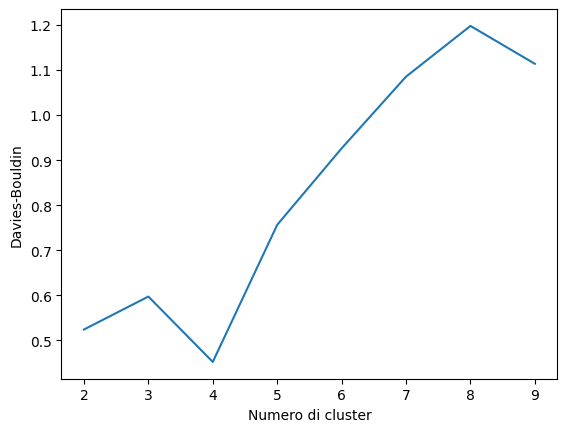

In [12]:
# Calcoliamo l'indice di Davies-Bouldin
# l'indice di Davies-Bouldin è un metodo per valutare la qualità del clustering
# varia tra 0 e infinito, più basso è una buona misura del numero di cluster in cui i dati potrebbero essere idealmente classificati
from sklearn.metrics import davies_bouldin_score

print('Davies-Bouldin: ', davies_bouldin_score(X, y_kmeans))

# visualizziamo l'indice di Davies-Bouldin per diversi valori di k
davies = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    davies.append(davies_bouldin_score(X, y_kmeans))

plt.plot(range(2, 10), davies)
plt.xlabel('Numero di cluster')
plt.ylabel('Davies-Bouldin')
plt.show()

Silhouette:  4
Calinski-Harabasz:  4
Davies-Bouldin:  4


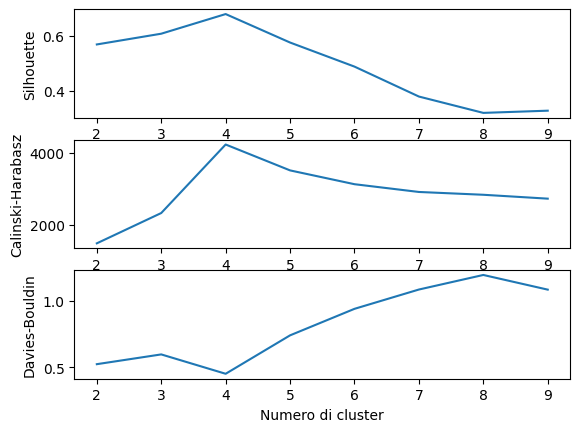

In [22]:
# confrontiamo con una funzione di utilità per il clustering partizionale
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_kmeans(X, k):

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)

    silhouette = silhouette_score(X, y_kmeans)
    calinski = calinski_harabasz_score(X, y_kmeans)
    davies = davies_bouldin_score(X, y_kmeans)

    return silhouette, calinski, davies

# visualizziamo i risultati
silhouette = []
calinski = []
davies = []
min_k = 2
max_k = 10
for k in range(min_k, max_k):
    s, c, d = evaluate_kmeans(X, k)
    silhouette.append(s)
    calinski.append(c)
    davies.append(d)

# visualizziamo il miglior valore per ogni indice
print('Silhouette: ', silhouette.index((max(silhouette)))+min_k)
print('Calinski-Harabasz: ', calinski.index((max(calinski)))+min_k)
print('Davies-Bouldin: ', davies.index((min(davies)))+min_k)

# plottiamo con assi separati
plt.subplot(3, 1, 1)
plt.plot(range(2, 10), silhouette)
plt.xlabel('Numero di cluster')
plt.ylabel('Silhouette')

plt.subplot(3, 1, 2)
plt.plot(range(2, 10), calinski)
plt.xlabel('Numero di cluster')
plt.ylabel('Calinski-Harabasz')

plt.subplot(3, 1, 3)
plt.plot(range(2, 10), davies)
plt.xlabel('Numero di cluster')
plt.ylabel('Davies-Bouldin')

plt.show()

